In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Lenovo\OneDrive - Alexandria University\Desktop\FuelConsumptionCo2.csv')
df



MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0             AS5        Z                   9.9                  6.7   
1              M6        Z                  11.2                  7.7   
2             AV7        Z                   6.0                  5.8   
3             AS6        Z                  12.7                  9.1   
4             AS6        Z                  12.1                  8.7   
...           ...      ...                   ...                  ...   
1062          AS6        X                  13.4                  9.8   
1063          AS6        X                  13.2                  9.5   
1064          AS6        X                  13.4                  9.8   
1065          AS6        X                  12.9                  9.3   
1066          AS6        X                  14.9                 10.2   

      FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                      8.5                        33           196  
1                      9.6                        29           221  
2                      5.9                        48           136  
3                     11.1                        25           255  
4                     10.6                        27           244  
...                    ...                       ...           ...  
1062                  11.8                        24           271  
1063                  11.5                        25           264  
1064                  11.8                        24           271  
1065                  11.3                        25           260  
1066                  12.8                        22           294  

[1067 rows x 13 columns]

In [3]:
print(df.describe())

       MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000 

In [4]:
# Display descriptive of data
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)



ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
5         3.5          6                  10.0           230
6         3.5          6                  10.1           232
7         3.7          6                  11.1           255
8         3.7          6                  11.6           267

In [5]:
correlated_data = cdf.corr()
correlated_data

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  \
ENGINESIZE              1.000000   0.934011              0.819482   
CYLINDERS               0.934011   1.000000              0.776788   
FUELCONSUMPTION_COMB    0.819482   0.776788              1.000000   
CO2EMISSIONS            0.874154   0.849685              0.892129   

                      CO2EMISSIONS  
ENGINESIZE                0.874154  
CYLINDERS                 0.849685  
FUELCONSUMPTION_COMB      0.892129  
CO2EMISSIONS              1.000000

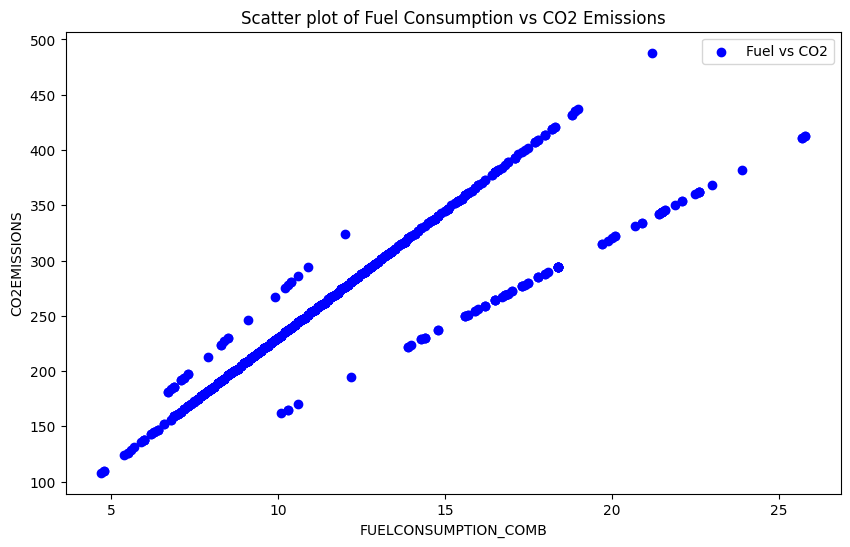

In [6]:
#Visual Representation on two-highest values in Correlation table
#Fuel Consumption With Co2Emission
plt.figure(figsize=(10, 6))
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue', label='Fuel vs CO2')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.title("Scatter plot of Fuel Consumption vs CO2 Emissions")
plt.legend()
plt.show()


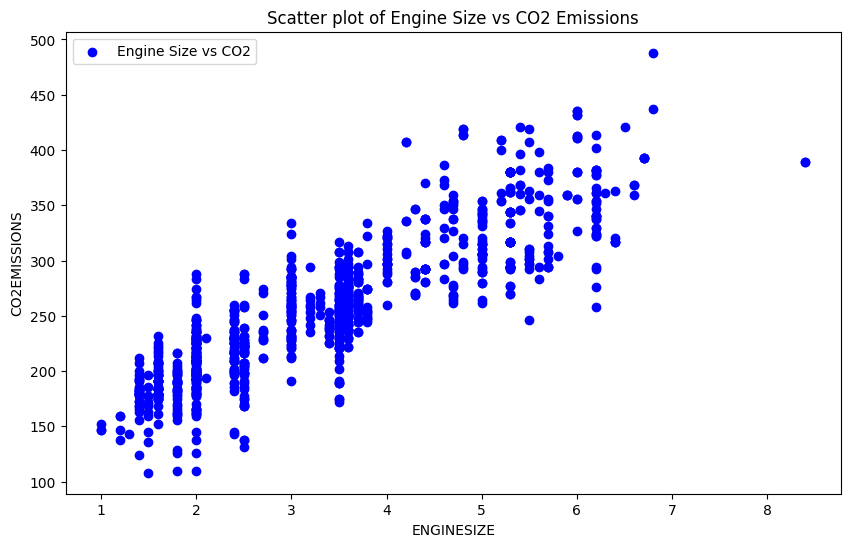

In [7]:
# Visualizing correlations
#Engine Size With Co2Emission
#best 2 features correlations
plt.figure(figsize=(10, 6))
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue', label='Engine Size vs CO2')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.title("Scatter plot of Engine Size vs CO2 Emissions")
plt.legend()
plt.show()


In [8]:
# Split data into train and test datasets
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

print(msk)

[False  True  True ...  True  True  True]


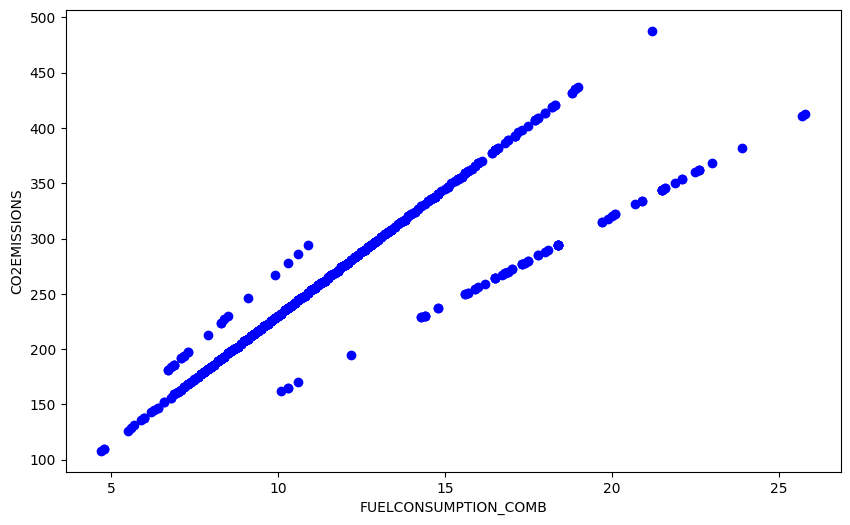

In [9]:
#Visual representation of data after splitting Between  FUELCONSUMPTION_COMB and CO2EMISSIONS
plt.figure(figsize=(10, 6))
plt.scatter(train.FUELCONSUMPTION_COMB , train.CO2EMISSIONS , color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

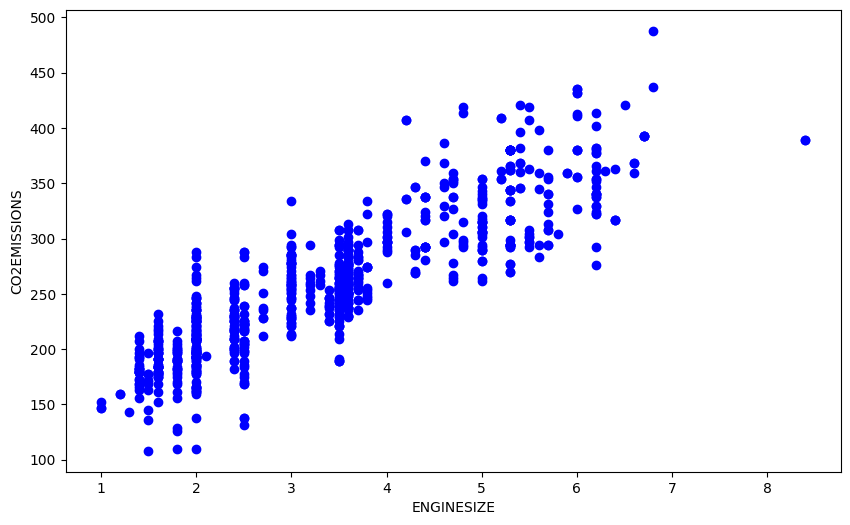

In [10]:
#Visual representation of data after splitting Between ENGINESIZE and CO2EMISSIONS
plt.figure(figsize=(10, 6))
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [11]:
# Simple Linear Regression
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)


LinearRegression()

In [12]:
#Calculating Coefficient and Intercept Values  # simple linear regression   
#traning of data to get best 0. & 01
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
print("Coefficient:" , regr.coef_)  #01
print("Intercept :" , regr.intercept_)  #0.

Coefficient: [[39.15002766]]
Intercept : [125.82991867]


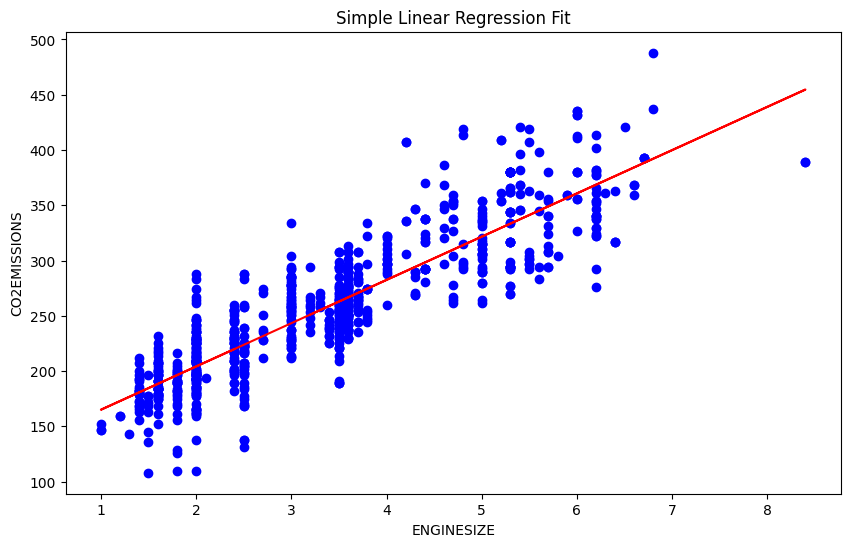

In [13]:
# Best fit line for simple linear regression
plt.figure(figsize=(10, 6))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x+regr.intercept_[0], '-r')         #Equation of linear Regression  (h= 0. + (01*x) )
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.title("Simple Linear Regression Fit")
plt.show()


In [14]:
# Getting Predictions and evaluation
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
y_hat = regr.predict(test_x)
print(y_hat)


[[204.12997399]
 [262.85501549]
 [219.78998506]
 [356.81508188]
 [204.12997399]
 [204.12997399]
 [204.12997399]
 [290.26003485]
 [243.28000166]
 [282.43002932]
 [282.43002932]
 [204.12997399]
 [204.12997399]
 [204.12997399]
 [204.12997399]
 [204.12997399]
 [243.28000166]
 [243.28000166]
 [298.09004038]
 [243.28000166]
 [243.28000166]
 [298.09004038]
 [243.28000166]
 [298.09004038]
 [298.09004038]
 [243.28000166]
 [243.28000166]
 [204.12997399]
 [204.12997399]
 [368.56009018]
 [368.56009018]
 [266.77001825]
 [266.77001825]
 [266.77001825]
 [368.56009018]
 [368.56009018]
 [180.6399574 ]
 [333.32506528]
 [333.32506528]
 [313.75005145]
 [360.73008464]
 [294.17503762]
 [368.56009018]
 [333.32506528]
 [180.6399574 ]
 [180.6399574 ]
 [333.32506528]
 [333.32506528]
 [266.77001825]
 [219.78998506]
 [219.78998506]
 [266.77001825]
 [266.77001825]
 [219.78998506]
 [348.98507635]
 [376.39009571]
 [348.98507635]
 [266.77001825]
 [219.78998506]
 [266.77001825]
 [266.77001825]
 [305.92004592]
 [270.68

In [15]:
print(test_y)  #print all true values and compare them with predicted values


[[196]
 [230]
 [212]
 [359]
 [202]
 [214]
 [230]
 [308]
 [285]
 [281]
 [281]
 [237]
 [200]
 [202]
 [209]
 [209]
 [230]
 [232]
 [281]
 [232]
 [246]
 [292]
 [191]
 [317]
 [317]
 [260]
 [253]
 [221]
 [232]
 [382]
 [382]
 [262]
 [269]
 [242]
 [294]
 [258]
 [177]
 [380]
 [362]
 [414]
 [413]
 [271]
 [324]
 [299]
 [184]
 [191]
 [294]
 [317]
 [290]
 [232]
 [230]
 [251]
 [222]
 [230]
 [301]
 [320]
 [294]
 [222]
 [198]
 [276]
 [259]
 [373]
 [281]
 [221]
 [288]
 [317]
 [283]
 [288]
 [175]
 [278]
 [205]
 [186]
 [126]
 [235]
 [258]
 [228]
 [344]
 [411]
 [419]
 [285]
 [259]
 [317]
 [294]
 [317]
 [186]
 [251]
 [161]
 [166]
 [246]
 [159]
 [198]
 [196]
 [237]
 [221]
 [143]
 [145]
 [232]
 [248]
 [172]
 [265]
 [253]
 [175]
 [306]
 [306]
 [230]
 [225]
 [250]
 [216]
 [216]
 [294]
 [251]
 [223]
 [193]
 [175]
 [212]
 [209]
 [400]
 [225]
 [342]
 [285]
 [345]
 [283]
 [347]
 [342]
 [239]
 [175]
 [283]
 [297]
 [271]
 [235]
 [207]
 [262]
 [145]
 [292]
 [347]
 [301]
 [198]
 [283]
 [290]
 [168]
 [223]
 [184]
 [216]

In [16]:
# Metrics
#Write A code that Test on this model and calculate
 #1.Mean absolute error(MAE)
 #2.Residual Sum of Squares (MSE)
 #3.R2-Score

MAE = mean_absolute_error(test_y, y_hat)
MSE = mean_squared_error(test_y, y_hat)
r2 = r2_score(test_y, y_hat)
print("Simple Linear Regression Metrics:")
print("Mean Absolute Error: %.2f" % MAE)
print("Residual Sum of Squares (MSE): %.2f" % MSE)
print("R2-Score: %.2f" % r2)


Simple Linear Regression Metrics:
Mean Absolute Error: 24.42
Residual Sum of Squares (MSE): 1086.26
R2-Score: 0.71


In [17]:
# Multiple Linear Regression
# Selecting the independent and dependent variables
X = cdf[['ENGINESIZE', 'CYLINDERS', 'CO2EMISSIONS']]
y = cdf['FUELCONSUMPTION_COMB']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Create and train the model train the model and get parameters 
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


LinearRegression()

In [19]:
# Making predictions on test data
y_pred = regr.predict(X_test)

# # Calculating Metrics
MSE_multi = mean_squared_error(y_test, y_pred)
r2_multi = r2_score(y_test, y_pred)
print("\nMultiple Linear Regression Metrics:")
print("Coefficients:", regr.coef_)  #01 ,02,03
print("Intercept:", regr.intercept_)  #0.
print("Mean Squared Error (MSE):", MSE_multi)
print("R2 Score:", r2_multi)


Multiple Linear Regression Metrics:
Coefficients: [ 0.6791144  -0.21404863  0.04089265]
Intercept: 0.07014778903577046
Mean Squared Error (MSE): 2.376809765510088
R2 Score: 0.8097362977133756


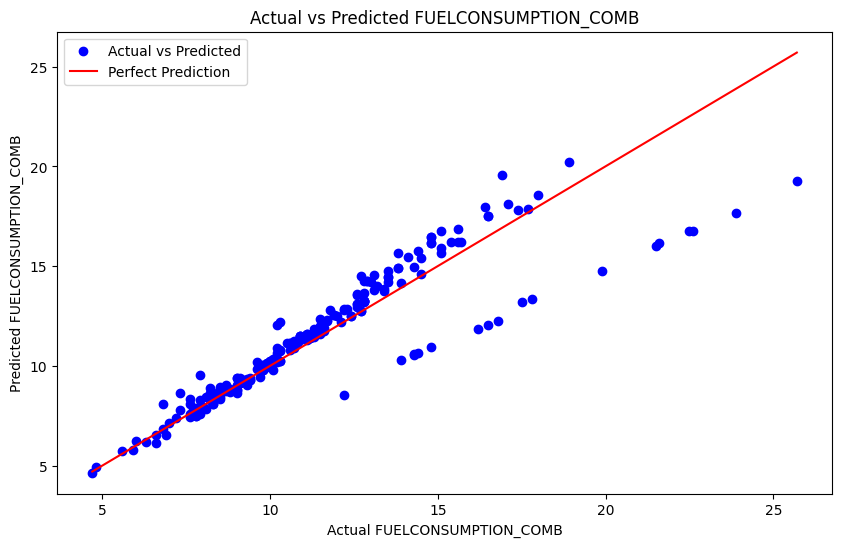

In [20]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')  # Use y_test for actual values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '-r', label='Perfect Prediction')  # Diagonal line for perfect prediction

plt.title('Actual vs Predicted FUELCONSUMPTION_COMB')
plt.xlabel("Actual FUELCONSUMPTION_COMB")
plt.ylabel("Predicted FUELCONSUMPTION_COMB")
plt.legend()
plt.show()

In [21]:
# Polynomial Regression
X_poly = train[['ENGINESIZE']]  #select  train feature 
poly = PolynomialFeatures(degree=2)   #make feature Engneering
X_poly_train = poly.fit_transform(X_poly)
X_poly_test = poly.transform(test[['ENGINESIZE']])  # Transform the test dataset

# Fit polynomial regression
poly_reg = linear_model.LinearRegression()
poly_reg.fit(X_poly_train, train_y)

# Making predictions on test data
y_pred = poly_reg.predict(X_poly_test)


In [22]:
# Calculating Metrics
MSE_poly = mean_squared_error(test[['CO2EMISSIONS']], y_pred)
r2_poly = r2_score(test[['CO2EMISSIONS']], y_pred)
print("\nMultiple Linear Regression Metrics:")
print("Coefficients:", poly_reg.coef_)  #01 ,02,03
print("Intercept:", poly_reg.intercept_)  #0.
print("Mean Squared Error (MSE):", MSE_poly)
print("R2 Score:", r2_poly)


Multiple Linear Regression Metrics:
Coefficients: [[ 0.         49.95742245 -1.43237247]]
Intercept: [108.626762]
Mean Squared Error (MSE): 1076.7745340555352
R2 Score: 0.7151415599285396


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15444\2496403279.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


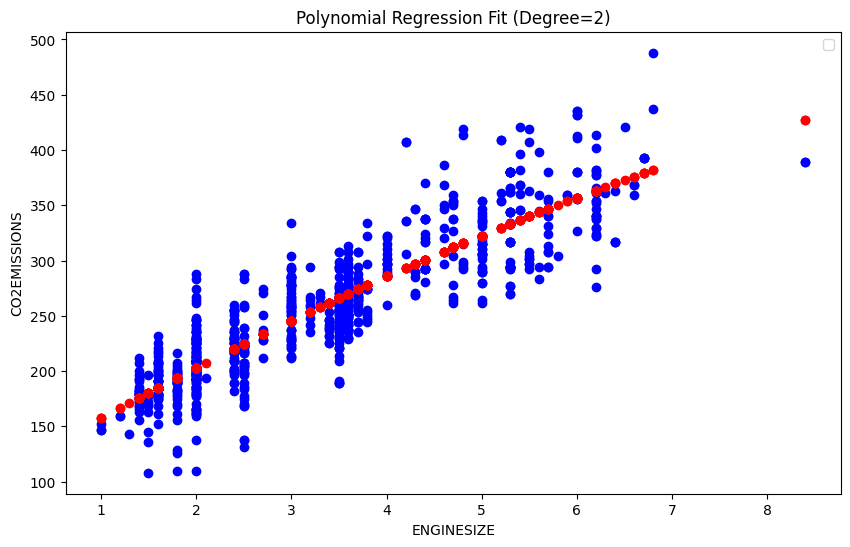

In [23]:
# Visualize Polynomial Regression
plt.figure(figsize=(10, 6))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.scatter(train.ENGINESIZE, poly_reg.predict(X_poly_train), color='red')
plt.title('Polynomial Regression Fit (Degree=2)')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()


Polynomial Regression Metrics (Degree=3):
Mean Squared Error (MSE): 1075.3839795452282
R2 Score: 0.715509428201899


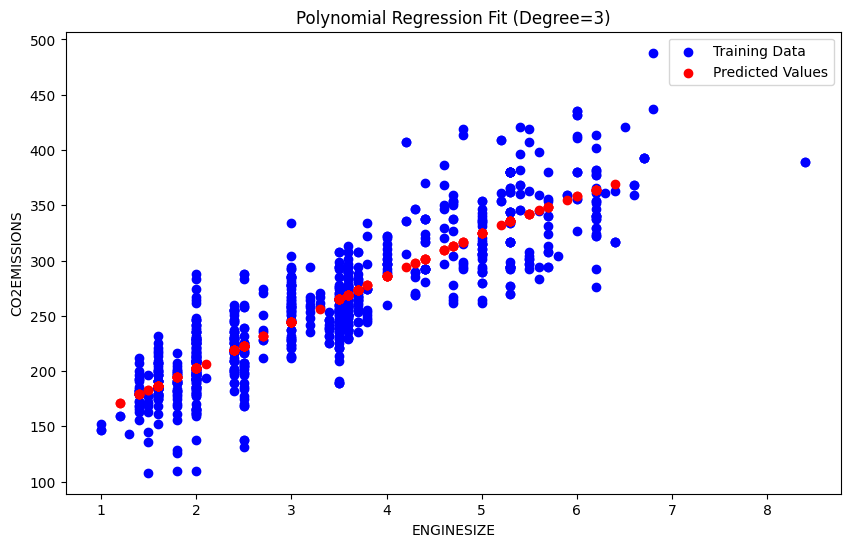


Polynomial Regression Metrics (Degree=4):
Mean Squared Error (MSE): 1075.538528890909
R2 Score: 0.7154685424972949


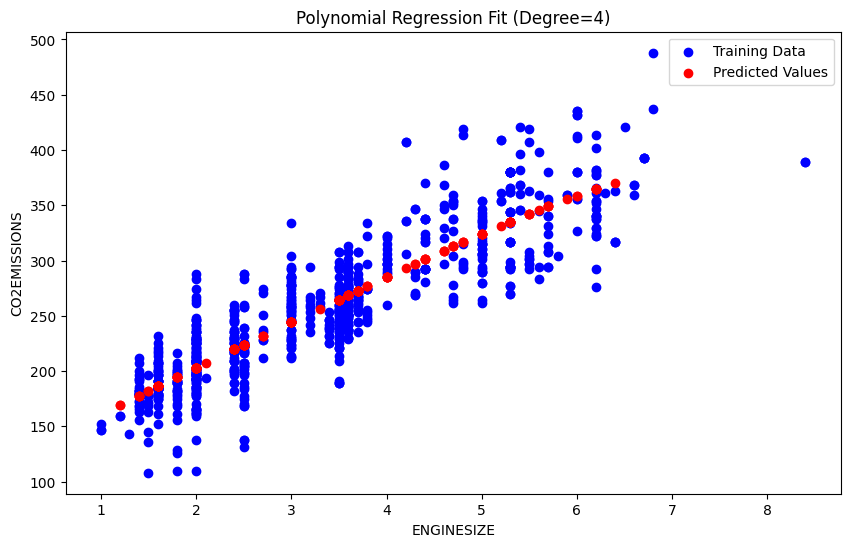

In [24]:
# Repeat for degrees 3 and 4
for degree in [3, 4]:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(train[['ENGINESIZE']])
    X_poly_test = poly.transform(test[['ENGINESIZE']])  # Transform the test dataset

    # Fit the polynomial regression model
    poly_reg = linear_model.LinearRegression()
    poly_reg.fit(X_poly_train, train_y)

    # Making predictions on test data
    y_pred = poly_reg.predict(X_poly_test)  # Use the polynomial model for predictions

    # Calculating Metrics
    MSE_poly = mean_squared_error(test[['CO2EMISSIONS']], y_pred)  # Compare with actual test values
    r2_poly = r2_score(test[['CO2EMISSIONS']], y_pred)
    
    print(f"\nPolynomial Regression Metrics (Degree={degree}):")
    print("Mean Squared Error (MSE):", MSE_poly)
    print("R2 Score:", r2_poly)

    # Visualizing the polynomial regression fit
    plt.figure(figsize=(10, 6))
    plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue', label='Training Data')
    plt.scatter(test.ENGINESIZE, y_pred, color='red', label='Predicted Values')
    plt.title(f'Polynomial Regression Fit (Degree={degree})')
    plt.xlabel('ENGINESIZE')
    plt.ylabel('CO2EMISSIONS')
    plt.legend()
    plt.show()